In [62]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
#read in CSV file
df = pd.DataFrame(pd.read_csv('../resources/acquisitions.csv'))
df = df[df['AcquisitionMonthDate'].notna()].reset_index()
df = df.astype({'AcquisitionMonthDate': 'int32'})
df.head()

,index,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,1,ACQ98,November,11,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google
2,2,ACQ97,December,8,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM
3,3,ACQ96,December,18,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft
4,4,ACQ95,December,21,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft


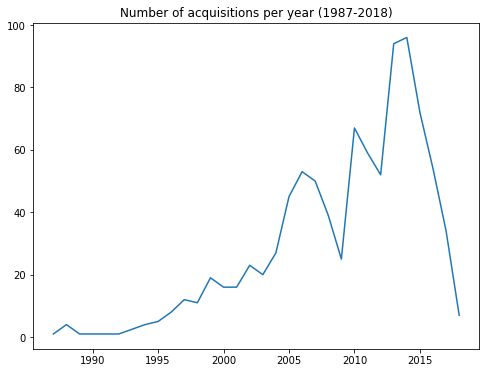

In [24]:
#create acquisitions_per_year series
acquisitions_per_year = df['AcquisitionYear'].value_counts().sort_index()
#plot acquisitions_per_year using pandas
acquisitions_per_year.plot(kind='line',title='Number of acquisitions per year (1987-2018)',figsize=(8,6))

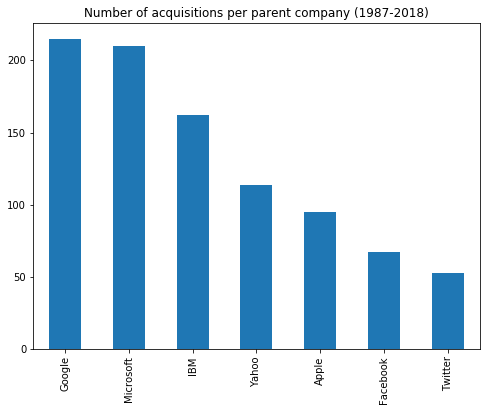

In [29]:
#plot number of acquisitions per parent company
df['ParentCompany'].value_counts()\
    .plot(kind='bar'\
    ,title='Number of acquisitions per parent company (1987-2018)'\
    ,figsize=(8,6))

In [106]:
#create date column to using to_datetime
df['Date'] = pd.to_datetime(df['AcquisitionYear'].astype(str) + 
                            df['AcquisitionMonth'] + 
                            df['AcquisitionMonthDate'].astype(str), 
                            format='%Y%B%d', 
                            errors='coerce')
df.head()

,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany,Date
0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google,2015-11-11
1,ACQ98,November,11,2015,Fly Labs,Video editing,USA,NaN,Google Photos,Google,2015-11-11
2,ACQ97,December,8,2015,Clearleap,Cloud-based video management,USA,NaN,NaN,IBM,2015-12-08
3,ACQ96,December,18,2015,Metanautix,Big Data Analytics,USA,NaN,NaN,Microsoft,2015-12-18
4,ACQ95,December,21,2015,"Talko, Inc.",Mobile communications,USA,NaN,NaN,Microsoft,2015-12-21


In [121]:
#create DF for only records with listed company values
listed_values = df[df['Value (USD)'].notna()].reset_index()
listed_values.head()

,level_0,index,AcquisitionID,AcquisitionMonth,AcquisitionMonthDate,AcquisitionYear,Company,Business,Country,Value (USD),Derived products,ParentCompany
0,0,0,ACQ99,November,11,2015,bebop,Cloud software,USA,380000000.0,Google Cloud Platform,Google
1,8,8,ACQ915,July,30,1987,"Forethought, Inc.",Computer software,USA,14000000.0,NaN,Microsoft
2,28,28,ACQ898,January,16,1996,Vermeer Technologies,Software,USA,133000000.0,NaN,Microsoft
3,32,32,ACQ894,April,23,1996,Aspect Software Engineering,Computer software,USA,14150000.0,NaN,Microsoft
4,36,36,ACQ890,February,3,1997,NetCarta,Internet software,USA,20000000.0,NaN,Microsoft


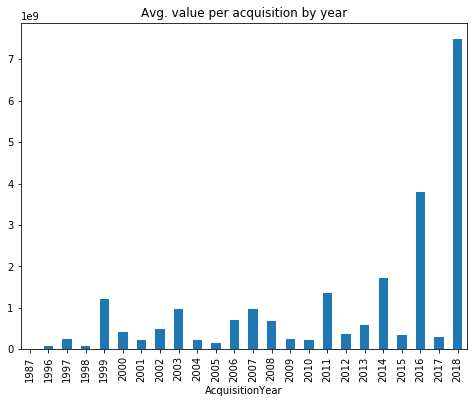

In [123]:
#plot bar graph of mean acquisition value
total_value_year = listed_values.groupby('AcquisitionYear')['Value (USD)'].mean().sort_index()
total_value_year.plot(kind='bar', figsize=(8,6), title='Avg. value per acquisition by year')